
# Build a Supervised Learning Model (Phase2)



In [ ]:


#  We choose SVM and Random Forest for our Diet Recommendation System because



#  Support Vector Machine (SVM):
# - SVM is ideal for diet recommendation because it performs well with structured data to predict a suitable diet.
# - It effectively handles complex, non-linear relationships between the factors needed to determine the diet and the diet level.
# - In our system, SVM achieved 97.50% accuracy, making it the best-performing model.

#  Random Forest:
# - Random Forest helps us understand which factors (e.g., BMI, calorie range) influence diet recommendations.
# - It works well with missing or imbalanced data, making it robust for real-world applications.
# - Since it builds multiple decision trees, it reduces overfitting and improves reliability.
# - Our results show that Random Forest achieved 91.50% accuracy, proving to be a strong model.

# Evaluation Metrics and Their Impact on Performance:
# A. Accuracy:
#    - Accuracy measures the proportion of correctly classified samples.
#    - SVM (97.50%) outperformed Random Forest (91.50%).
#    - This indicates that SVM correctly classifies more diet recommendations.
#
# B. Precision, Recall, and F1-Score:
#    1. Precision:
#       - Measures the proportion of correct positive predictions.
#       - SVM has high precision across all classes (~1.00), meaning fewer false positives.
#       - Random Forest has lower precision in class 2 (~0.94), indicating some misclassifications.
#
#    2. Recall:
#       - Measures the ability to correctly identify all relevant instances.
#       - SVM achieved 1.00 recall for classes 0 and 2, meaning no false negatives.
#       - Random Forest had a lower recall (0.78 for class 2), meaning some instances were missed.
#
#    3. F1-Score:
#       - The harmonic mean of precision and recall.
#       - SVM has near-perfect F1-scores (~1.00), while Random Forest has lower values due to misclassifications.
#
# C. Confusion Matrix Insights:
#    - The confusion matrix reveals that:
#      - SVM has almost perfect classification with very few misclassified instances.
#      - Random Forest misclassified 14 instances in class 2, indicating difficulty in handling some patterns.
#

# Conclusion:
# - SVM provides higher accuracy, making it the preferred choice for diet prediction.
# - Random Forest helps with feature importance, allowing us to see which health factors affect diet recommendations the most.
# - SVM was chosen as the primary model due to its high accuracy (97.50%) in predicting diet plans.

In [2]:
%pip install pandas scikit-learn ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# Import necessary libraries
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, HTML
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets for model evaluation
from sklearn.ensemble import RandomForestClassifier  # Implements the Random Forest algorithm for classification tasks
from sklearn.svm import SVC # Implements Support Vector Classification (SVM), a powerful machine learning algorithm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # Provides plotting functionality for data visualization 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
# Import evaluation metrics:
# - accuracy_score: Measures the percentage of correctly classified samples.
# - classification_report: Provides precision, recall, F1-score, and support for each class.
# - confusion_matrix: Displays the number of correct and incorrect predictions for each class.


In [13]:
# Load the preproccessting dataset
csv_path = "dataset_preprocessed (3).csv"  
df = pd.read_csv(csv_path)

# Define feature columns and target column
feature_cols = ['Gender', 'Disease_Type', 'Physical_Activity_Level', 'Age_Range', 'BMI_Range', 'Calorie_Range']
target_col = 'Diet_Recommendation'

# Select features and target
X = df[feature_cols]  
y = df[target_col]  


# Split the dataset into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=1, stratify=y
)




🔹 Random Forest Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       0.78      0.94      0.85        52
           2       0.94      0.78      0.85        63

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.92      0.92      0.91       200

Accuracy: 0.9150


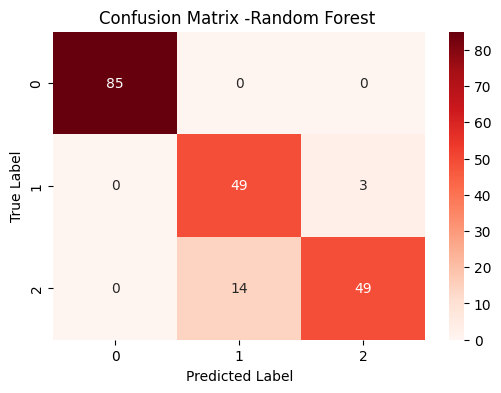


🔹 SVM Model Performance (Without Scaling):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      0.90      0.95        52
           2       0.93      1.00      0.96        63

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

Accuracy: 0.9750


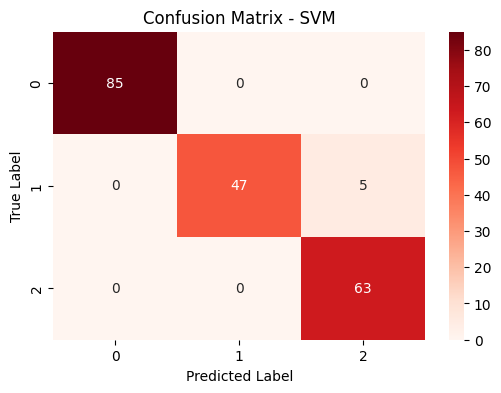


🔹 Model Comparison:
Random Forest Accuracy: 91.50%
SVM Accuracy: 97.50%


In [14]:
  # 1.1-Apply Random Forest for Diet Recommendation

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=2,  # Number of trees in the forest (increasing this can improve learning)
    max_depth=10,  # Limits the depth of each tree to prevent overfitting
    max_leaf_nodes=10,  # Restricts the maximum number of leaf nodes for simplicity
    min_samples_split=6,  # Minimum samples required to split a node (higher values reduce overfitting)
    random_state=42  # Ensures reproducibility of results
)


# Train the Random Forest model on the training dataset
rf_classifier.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_rf = rf_classifier.predict(X_test)

#1.2-Evaluate Random Forest Model Performance
print("\n🔹 Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))  #classification_report: Provides precision, recall, F1-score, and support for each class.
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")  # # accuracy_score: Measures the percentage of correctly classified samples.

# 1.3-Generate Confusion Matrix for SVM(confusion_matrix: Displays the number of correct and incorrect predictions for each class.)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Reds", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix -Random Forest ")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##################################################################################

 #2.1-Apply Support Vector Machine( SVM )for Diet Recommendation


# Initialize the SVM Classifier

svm_model = SVC(
    kernel='rbf',  # RBF kernel
    C=0.07,  # Slightly increased C for better classification
    gamma="auto",  # Adjust gamma for a more flexible decision boundary
    random_state=42
)

# Train SVM 
svm_model.fit(X_train, y_train)  # Train on raw (unscaled) data
y_pred_svm = svm_model.predict(X_test)  # Predict on raw (unscaled) test data


# 2.2-Evaluate SVM Model Performance
print("\n🔹 SVM Model Performance (Without Scaling):")
print(classification_report(y_test, y_pred_svm)) # classification_report: Provides precision, recall, F1-score, and support for each class.
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}") # accuracy_score: Measures the percentage of correctly classified samples.


# 2.3-Generate Confusion Matrix for SVM ( confusion_matrix: Displays the number of correct and incorrect predictions for each class.)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Reds", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



# 3-Compare Both Models


rf_accuracy = accuracy_score(y_test, y_pred_rf)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print("\n🔹 Model Comparison:")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")